# Statistical Analysis of Retail Sales Data

In [51]:
#======================
#Environment Setup
#======================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
# load data

df = pd.read_csv(r"C:\Users\Administrator\Desktop\projects\store_sales.csv")


In [53]:
# shows first 10 rows to understand the structure

df.head(10)    

,CustomerID,Age,Gender,Category,ItemPurchased,Amount,Season,PaymentMethod,ItemRating,DiscountApplied(%),PreviousPurchases
0,1,58,Female,Accessories,Handbag,115.50,Autumn,Card,3.5,18,4
1,2,40,Male,Mens Clothing,Shirt,103.43,Spring,Card,4.1,13,4
2,3,66,Female,Sports,Football,35.45,Spring,Card,3.3,11,3
3,4,39,Female,Accessories,Handbag,153.31,Spring,Card,4.4,13,4
4,5,23,Female,Home,Curtains,151.43,Winter,Card,4.1,20,10
5,6,48,Male,Groceries,Snacks,36.76,Autumn,Card,2.5,14,2
6,7,54,Male,Electronics,Mobile Phone,1396.16,Autumn,Card,4.7,18,4
7,8,59,Female,Beauty,Perfume,35.55,Summer,Card,4.6,14,7
8,9,51,Male,Electronics,Smart Watch,2238.79,Spring,Card,4.3,20,5
9,10,47,Female,Footwear,Formal Shoes,225.49,Spring,Card,4.7,18,4


In [54]:
#inspect data types and completeness

df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Gender              5000 non-null   object 
 3   Category            5000 non-null   object 
 4   ItemPurchased       5000 non-null   object 
 5   Amount              5000 non-null   float64
 6   Season              5000 non-null   object 
 7   PaymentMethod       5000 non-null   object 
 8   ItemRating          5000 non-null   float64
 9   DiscountApplied(%)  5000 non-null   int64  
 10  PreviousPurchases   5000 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 429.8+ KB


# data Cleaning 
checking for missing values and duplicate records then dropping then if they are there , to prevent a biased Statistical results 

In [61]:
# drop any duplicate in the data set

df =df.drop_duplicates()    
df

,CustomerID,Age,Gender,Category,ItemPurchased,Amount,Season,PaymentMethod,ItemRating,DiscountApplied(%),PreviousPurchases
0,1,58,Female,Accessories,Handbag,115.50,Autumn,Card,3.5,18,4
1,2,40,Male,Mens Clothing,Shirt,103.43,Spring,Card,4.1,13,4
2,3,66,Female,Sports,Football,35.45,Spring,Card,3.3,11,3
3,4,39,Female,Accessories,Handbag,153.31,Spring,Card,4.4,13,4
4,5,23,Female,Home,Curtains,151.43,Winter,Card,4.1,20,10
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,44,Female,Accessories,Sunglasses,172.64,Winter,Card,3.6,20,5
4996,4997,59,Male,Groceries,Beverages,54.00,Spring,Cash on Delivery,3.8,14,2
4997,4998,41,Female,Accessories,Handbag,159.33,Autumn,Card,4.3,26,8
4998,4999,63,Female,Womens Clothing,Skirt,173.82,Autumn,Card,4.8,26,8


In [62]:
# check for missing values 

df.isnull().sum()

CustomerID            0
Age                   0
Gender                0
Category              0
ItemPurchased         0
Amount                0
Season                0
PaymentMethod         0
ItemRating            0
DiscountApplied(%)    0
PreviousPurchases     0
dtype: int64

# analysing data 

In [63]:
df.describe()    

,CustomerID,Age,Amount,ItemRating,DiscountApplied(%),PreviousPurchases
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.224800,285.090522,3.784160,14.983600,5.008800
std,1443.520003,14.564995,551.454382,0.681796,5.988063,2.194285
min,1.000000,20.000000,5.080000,1.100000,0.000000,0.000000
25%,1250.750000,33.000000,70.547500,3.300000,11.000000,3.000000
50%,2500.500000,45.000000,122.485000,3.800000,15.000000,5.000000
75%,3750.250000,58.000000,184.535000,4.300000,19.000000,6.000000
max,5000.000000,70.000000,2997.940000,5.000000,36.000000,13.000000


In [64]:
 # trying to see how much each revenue does each category generate

Category_rev = df.groupby("Category")["Amount"].sum().sort_values(ascending=False)  
Category_rev



Category
Electronics        895402.35
Footwear           141142.24
Sports             115598.11
Womens Clothing     61718.41
Mens Clothing       59680.43
Accessories         47633.83
Home                46374.22
Beauty              43887.06
Groceries           14015.96
Name: Amount, dtype: float64

In [65]:
category_Percentage=((df.groupby("Category")["Amount"].sum())/df["Amount"].sum())*100
category_Percentage

Category
Accessories         3.341664
Beauty              3.078816
Electronics        62.815301
Footwear            9.901574
Groceries           0.983264
Home                3.253298
Mens Clothing       4.186771
Sports              8.109572
Womens Clothing     4.329741
Name: Amount, dtype: float64

# Revenue by Category Analysis


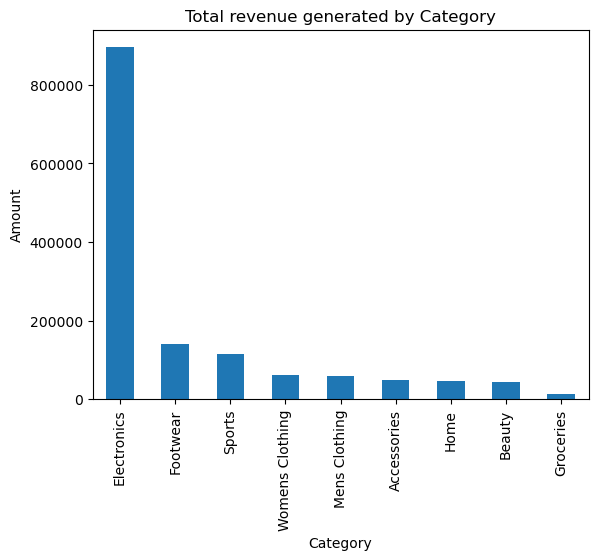

In [20]:
Category_rev.plot(kind="bar")
plt.title("Total revenue generated by Category")
plt.xlabel("Category")
plt.ylabel("Amount")
plt.show()

# Interpretation 
Electronics contributes the largest share of revenue, highlighting a significant concentration in demand.


# Statistical Summary 

In [66]:
# Compute total transaction revenue per product category
# This measures each category’s contribution to overall sales

category_revenue = df.groupby("Category")["Amount"].sum()


In [67]:
# Generate descriptive statistical summaries per category
# Includes count, mean, standard deviation, quartiles, and range
#Analyzes how spending is distributed among product groups

desc_stats = df.groupby("Category")["Amount"].describe()
desc_stats


,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Accessories,470.0,101.348574,46.537191,20.11,60.5275,101.305,142.460,179.83
Beauty,529.0,82.962306,37.090375,20.03,51.0400,81.650,114.320,149.31
Electronics,507.0,1766.079586,724.086311,500.44,1169.8800,1775.370,2408.710,2997.94
Footwear,983.0,143.583154,61.026415,40.21,90.7250,142.780,197.550,249.92
Groceries,332.0,42.216747,21.760691,5.08,22.7725,42.665,60.780,79.82
Home,286.0,162.147622,73.928747,30.41,105.6700,160.650,219.355,299.96
Mens Clothing,511.0,116.791448,48.832814,30.21,75.8550,117.370,161.750,199.98
Sports,835.0,138.440850,64.401300,25.02,84.2450,137.670,193.355,249.30
Womens Clothing,547.0,112.830731,50.069664,30.38,68.6200,108.880,154.635,199.98


# Interpretation 
More footwear iteams were sold but the category with the highest revenue is electronic , due to the fact that electronics are more
 expensive 

In [69]:
# Using the variance to check how spread out the transaction amounts are inside each category

Var=df.groupby("Category")["Amount"].var()   # how does the variance help me
Var

Category
Accessories          2165.710133
Beauty               1375.695944
Electronics        524300.985381
Footwear             3724.223283
Groceries             473.527664
Home                 5465.459568
Mens Clothing        2384.643689
Sports               4147.527421
Womens Clothing      2506.971217
Name: Amount, dtype: float64

# Interpretation 
Variance analysis indicates substantial differences in transaction dispersion across product categories.
Electronics Category has a higher variance compare to others 

In [71]:

# Compute skewness of transaction amounts per category
# Skewness measures distribution asymmetry
# Values near 0 indicate symmetry
# Values > 1 indicate strong right skew

skewness= df.groupby("Category")["Amount"].skew()    # 0-> symmetry  , >1 highly skewed
skewness                                             # >0 right skew ,<0 left skew 

Category
Accessories       -0.061519
Beauty             0.040671
Electronics       -0.057602
Footwear           0.058002
Groceries         -0.002872
Home               0.028769
Mens Clothing     -0.040912
Sports             0.011152
Womens Clothing    0.067349
Name: Amount, dtype: float64

# Revenue Distribution by Product Category

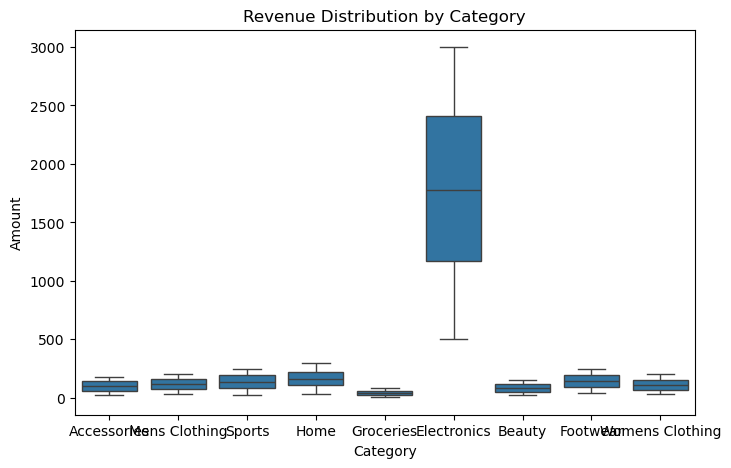

In [72]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Category", y="Amount", data=df)
plt.title("Revenue Distribution by Category")
plt.show()


In [73]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [74]:
# Perform Shapiro–Wilk normality test for each category
# Tests whether transaction amounts follow a normal distribution
# H0: data is normally distributed
# If p-value < 0.05 → reject normality assumption


for name, group in df.groupby("Category"):
    stat, p= stats.shapiro(group["Amount"])
    print(f"{name}:p-value={p:.15f}")

Accessories:p-value=0.000000000019637
Beauty:p-value=0.000000000006965
Electronics:p-value=0.000000000050441
Footwear:p-value=0.000000000000000
Groceries:p-value=0.000000003675730
Home:p-value=0.000004113098674
Mens Clothing:p-value=0.000000000009255
Sports:p-value=0.000000000000016
Womens Clothing:p-value=0.000000000000831


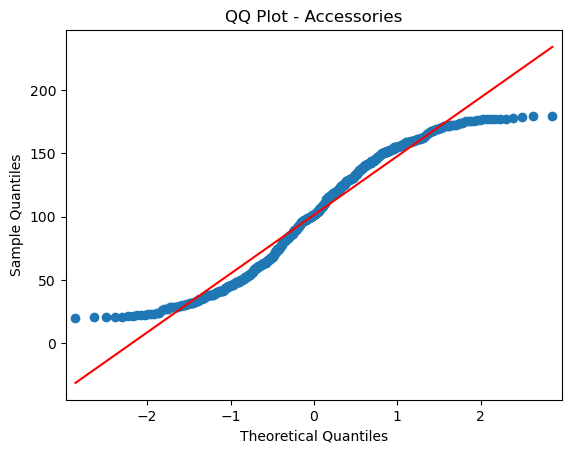

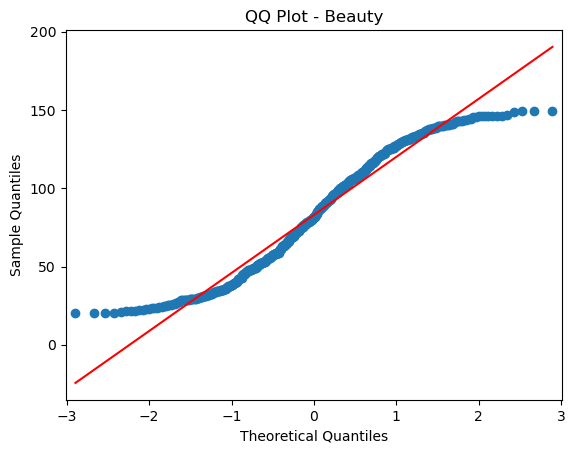

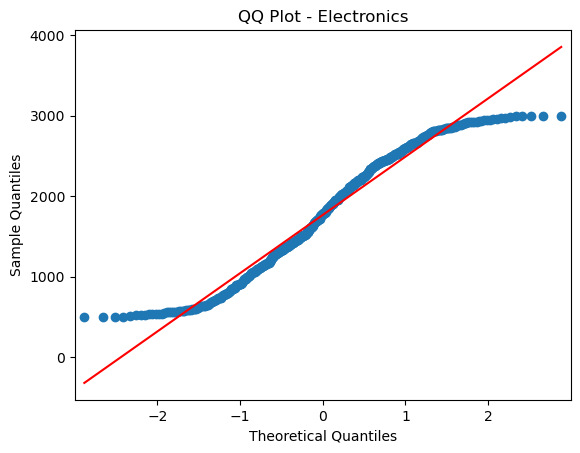

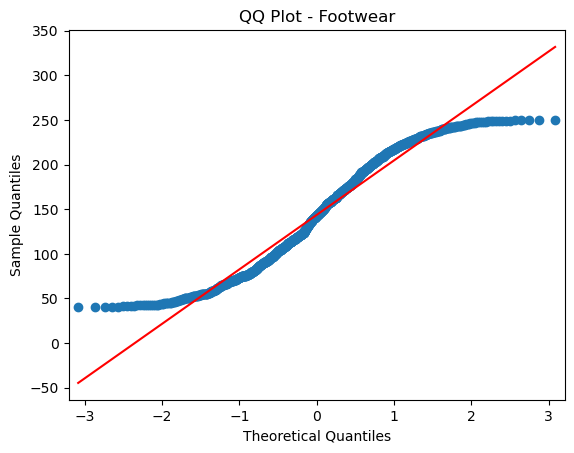

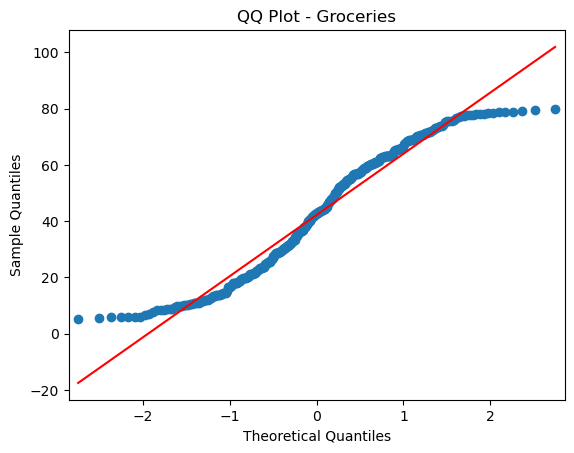

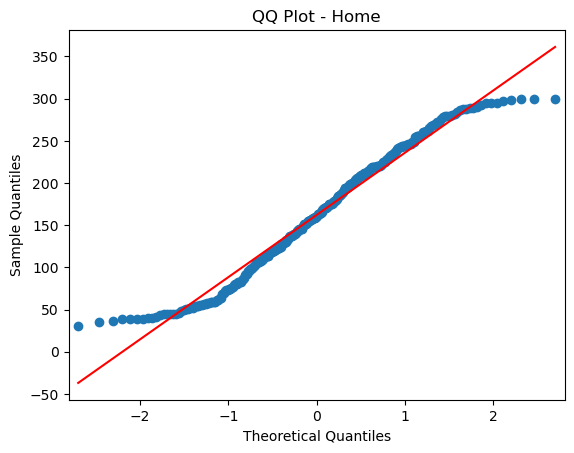

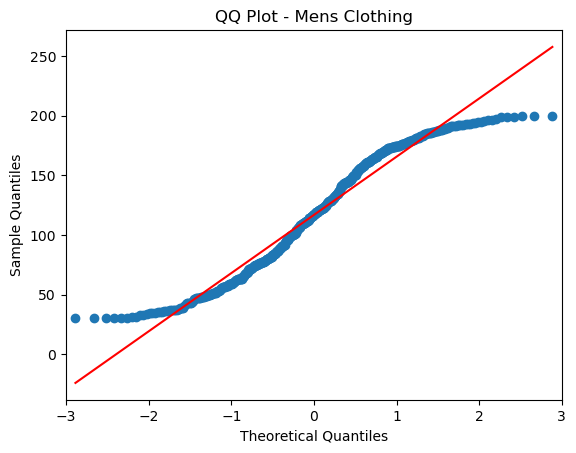

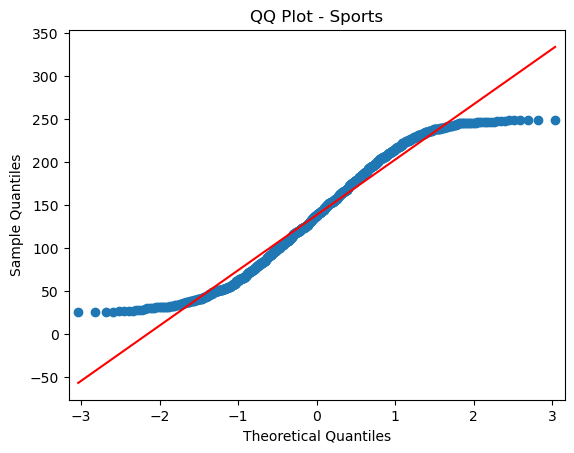

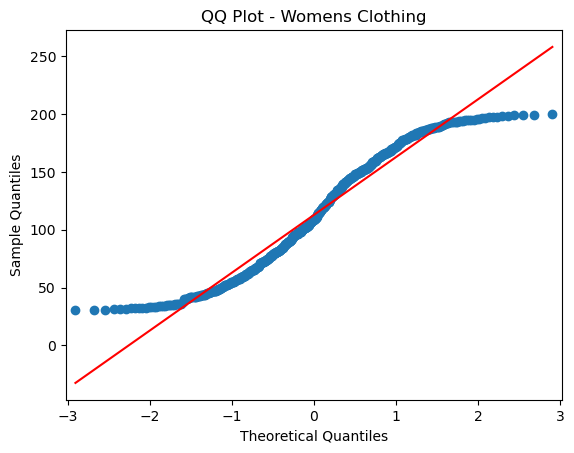

In [43]:
for name,group in df.groupby("Category"):
    sm.qqplot(group["Amount"],line= "s")
    plt.title(f"QQ Plot - {name}")
    plt.show()

In [75]:
# checking the assumptions
# null= All groups have equal variance 
# alternative=Atleast one group variance differs 


groups = [group["Amount"].values for name, group in df.groupby("Category")]

levene_stat, levene_p = stats.levene(*groups)
print("Levene p-value:", levene_p)


Levene p-value: 0.0


# Interpretation 

since the p-value =0 , which is less than 0.05 we will Reject the null hypothesis which means the variance are not equal 

In [76]:
#Perform one-way ANOVA to test whether mean transaction amounts
# null hypothesis: Mean transaction amount is equal across all categories
# alternative hypothesis:At least one category mean differs 


f_stat, p_value = stats.f_oneway(*groups)

print("F-statistic:", f_stat)
print("ANOVA p-value:", p_value)


F-statistic: 2782.1393889035253
ANOVA p-value: 0.0


# interpretation 
The test produced a very large F-statistic and a near-zero p-value.
At the 5% significance level, the null hypothesis of equal means is rejected.
This indicates statistically significant differences in average transaction amounts between categories.


In [47]:
model = smf.ols("Amount ~ C(Category)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                   sum_sq      df            F  PR(>F)
C(Category)  1.241752e+09     8.0  2782.139389     0.0
Residual     2.784540e+08  4991.0          NaN     NaN


# Interpretation 
An OLS model was fitted with transaction amount explained by category
The ANOVA table shows a very large F-statistic and a near-zero p-value,
indicating that mean transaction amounts differ significantly across categories

In [77]:
# Compute eta-squared effect size
# Measures proportion of total variance explained by category

eta_squared = (
    anova_table["sum_sq"]["C(Category)"] /
    anova_table["sum_sq"].sum()
)

print("Eta Squared:", eta_squared)


Eta Squared: 0.8168313668807374


# Interpretation
Eta-squared is approximately 0.82, indicating that category explains
about 82% of total variance in transaction amounts.


In [78]:
# Tukey Post-Hoc Test Identifies which specific category means differ
# Controls family-wise error rate across multiple comparisons

tukey = pairwise_tukeyhsd(
    endog=df["Amount"],
    groups=df["Category"],
    alpha=0.05
)

print(tukey)


            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
    group1         group2      meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------------------
  Accessories          Beauty   -18.3863 0.9505   -64.8469    28.0743  False
  Accessories     Electronics   1664.731    0.0  1617.7986  1711.6635   True
  Accessories        Footwear    42.2346 0.0386     1.1304    83.3388   True
  Accessories       Groceries   -59.1318 0.0143  -111.6788    -6.5848   True
  Accessories            Home     60.799 0.0175     5.8313   115.7668   True
  Accessories   Mens Clothing    15.4429 0.9838   -31.4011    62.2869  False
  Accessories          Sports    37.0923 0.1398    -5.1738    79.3583  False
  Accessories Womens Clothing    11.4822 0.9976   -34.6174    57.5817  False
       Beauty     Electronics  1683.1173    0.0  1637.5632  1728.6713   True
       Beauty        Footwear    60.6208 0.0001    21.0978   100.1439   True

In [50]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     2782.
Date:                Sat, 14 Feb 2026   Prob (F-statistic):               0.00
Time:                        10:54:40   Log-Likelihood:                -34414.
No. Observations:                5000   AIC:                         6.885e+04
Df Residuals:                    4991   BIC:                         6.890e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

# Interpretation 

Regression coefficients represent mean differences relative to the reference category.
Electronics shows a very large positive and statistically significant effect,
indicating much higher average transaction amounts.
Several clothing categories have non-significant coefficients,
suggesting similar mean spending to the reference category.